In [1]:
import numpy as np
from lib.mmsbm import mmsbm
import pandas as pd
import seaborn as sns

In [2]:
# Constants
train = "u1.base"
test = "u1.test"
sampling = 1
# Number of groups of users
k = 3
# Number of groups of items
l = 6
# Iterations
# To plateau the coefficients the minimum is 600
iterations = 200

In [3]:
s_prs, accuracy, mae, s2, s2pond = mmsbm(
    train_set=train,
    test_set=test,
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=1714
)

INFO:MMSBM:Running 1 runs of 600 iterations.
INFO:MMSBM:Running run 1 out of 1.
100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [06:31<00:00,  1.53it/s]
INFO:MMSBM:Done 1 runs in 6.56 minutes.
INFO:MMSBM:We had an accuracy of 0.42432892628205127, a MAE of 0.672275641025641 and s2 and weighted s2 of 15110 and 57502.


In [4]:
temp = np.array(s_prs[0])
ev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))
ev["iteration"] = ev.index + 1
ev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))

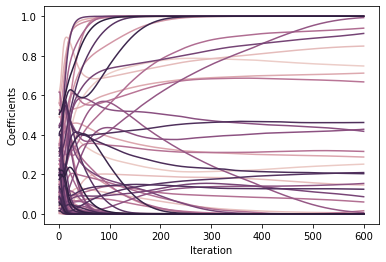

In [5]:
g = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)
g.set(xlabel='Iteration', ylabel='Coefficients')
g.legend_.remove()